# What is the impact of class imbalance and different sampling methods on the performance of machine learning algorithms for classification?

Class imbalance is a common challenge in many real-world classification problems. Having significantly fewer samples for one class can lead to biasad models that favor the majority class. This results in poor performance in detecting the minority class. In this research project, we investigate the impact of class imbalance on the performance of two popular machine learning algorithms: Support Vector Machines (SVM) and Neural Networks (NN). We compare the in-sample and out-of-sample performance of these algorithms on datasets with varying degrees of class imbalance using different techniques to adress this issue. Our goal is to provide insights into strengths and weaknesses of each algorithm and to identify the effective approach.


# Support Vector Machines

# Neural Networks

# Random under-sampling & random over-sampling

The most naive class of techniques for dealing with class imbalances is sampling. Random under-sampling involves removing some of the majority class samples at random until the dataset is balanced. Whereas random over-sampling involves duplicating some of the minority class samples at random until the dataset is balanced.

# SMOTE

SMOTE is a more sophisticated technique that generates synthetic samples for the minority class based on the characteristics of that class. This helps to balance the classes while preserving the information in the dataset.

# The impact of class imbalance, comparing Support Vector Machines with Neural Networks

In [ ]:
#import required for libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn


from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

#from sklearn.inspection import DecisionBoundaryDisplay
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


In [80]:
# 3 of 8 random state
def create_dataset(weights, n_samples, n_classes,
                   class_sep, n_clusters):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=13)

In [42]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

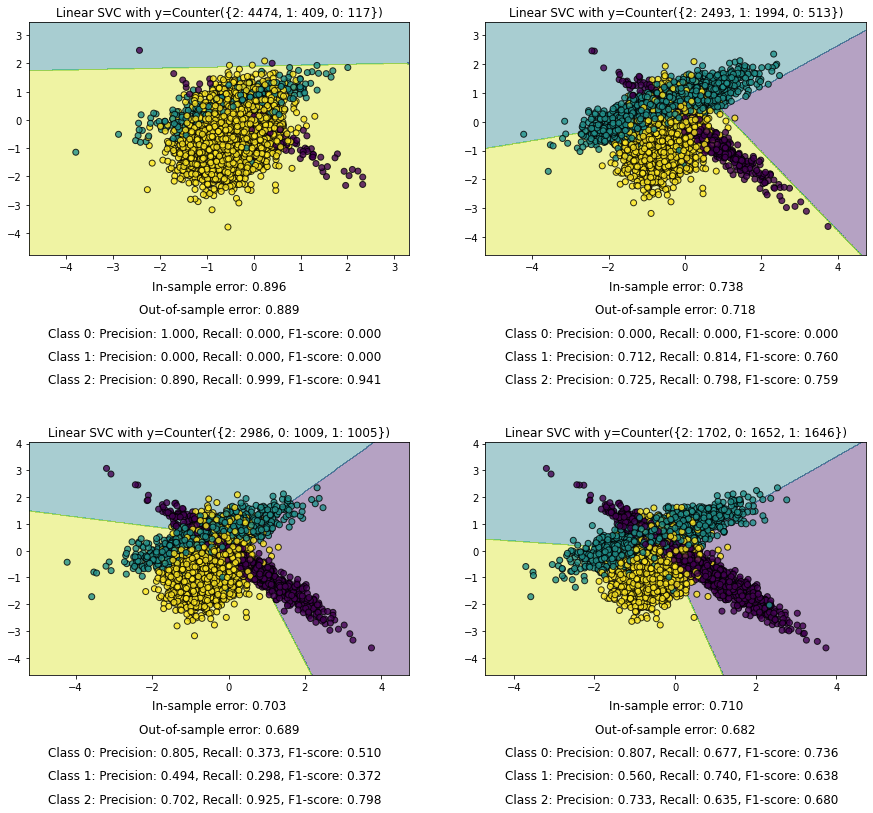

In [60]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.8)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.02, 0.08, 0.9), (0.1, 0.4, 0.5),
               (0.2, 0.2, 0.6), (0.33, 0.33, 0.34))

for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=5000, n_classes=3, class_sep=0.5, n_clusters=1)
 
    ax.set_title('Linear SVC with y={}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LinearSVC().fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

Class 2 = yellow 
Class 1 = blue
Class 0 = purple 

# Neural Nets

/Users/milandeschinckel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/milandeschinckel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/milandeschinckel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/milandeschinckel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converge

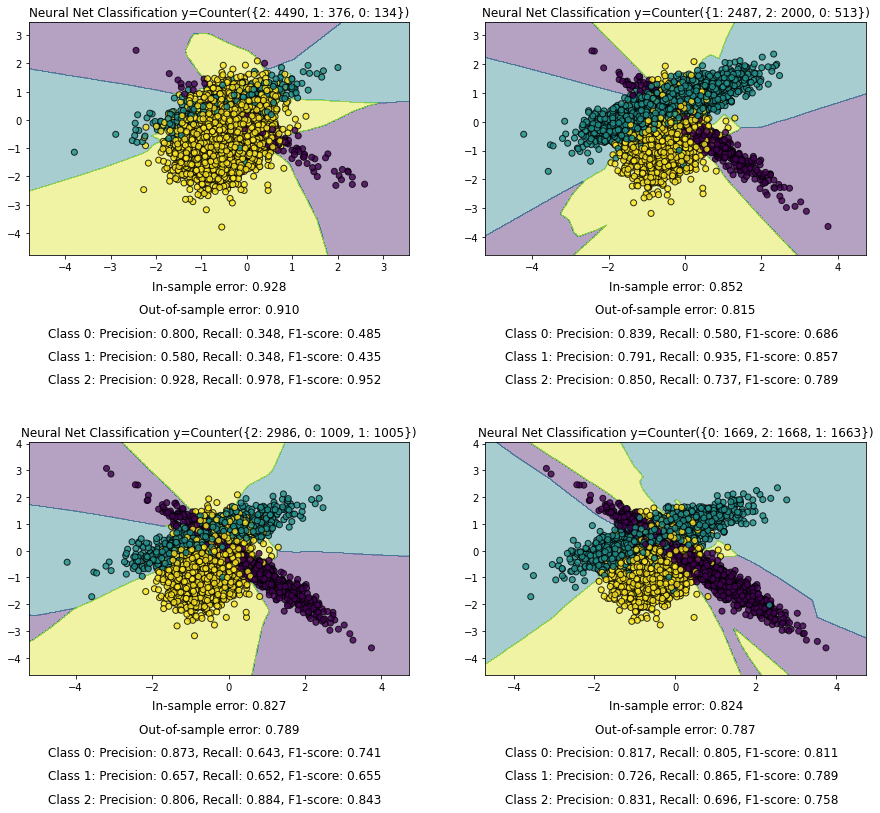

In [63]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.8)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.02, 0.07, 0.9), (0.1, 0.5, 0.8),
               (0.2, 0.2, 0.6), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=5000, n_classes=3, class_sep=0.5, n_clusters=1)
 
    ax.set_title('Neural Net Classification y={}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Neural Net
    
    params = {
        'hidden_layer_sizes': (40, 100, 80),
        'random_state' : 20,
        'max_iter': 1000,
        'n_iter_no_change' : 200
    }
    clf = MLPClassifier(**params, activation='relu').fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

# TWO CLASSES 

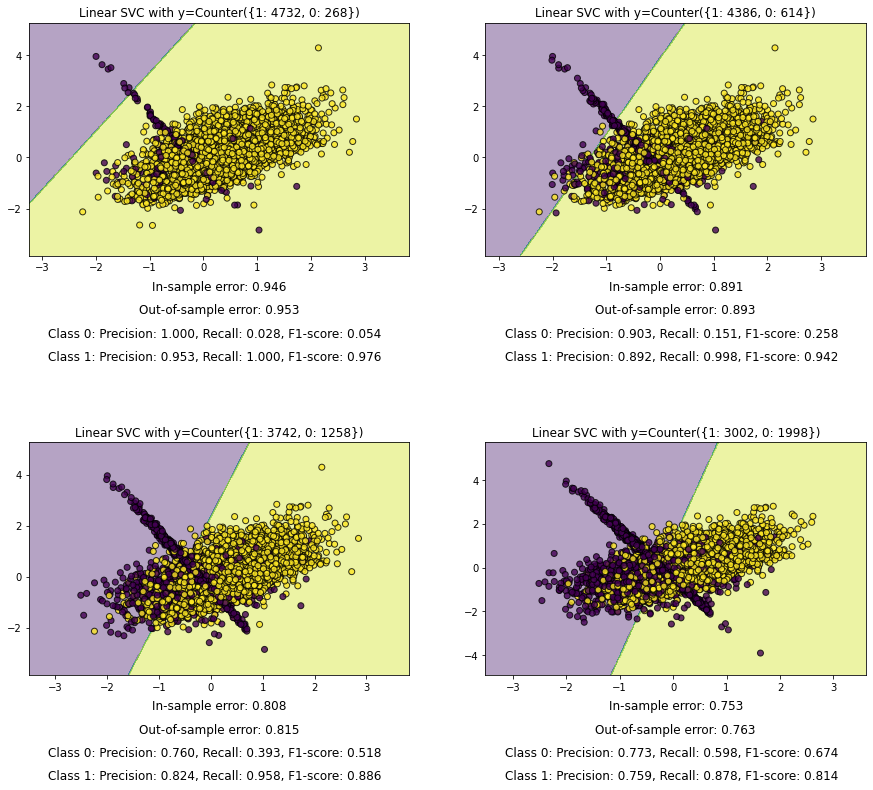

In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.8)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.05, 0.95), (0.12, 0.88),
               (0.25, 0.75), (0.4, 0.6))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=5000, n_classes=2,
                   class_sep=0.4, n_clusters=2)
 
    ax.set_title('Linear SVC with y={}'.format(Counter(y)))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LinearSVC().fit(X_train, y_train)
    
    plot_decision_function(X, y, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)




Precision is a measure of how many of the predicted positive cases are actually positive, while recall is a measure of how many of the actual positive cases are correctly identified as positive by the model.

If there are very few positive cases in the dataset, it is possible for the model to correctly identify all of the positive cases (high precision), but still miss many of the actual positive cases (low recall). In this case, the precision would be 1, while the recall would be low.


a high precision means that the model is making very few false positive predictions (i.e., predicting a positive case when it's actually negative)

while a low recall means that the model is missing many of the positive cases and failing to identify them as positive.

This can happen in datasets where the positive class is rare or under-represented. In such cases, a classifier may be biased towards the negative class and tend to make negative predictions for most instances, resulting in high precision but low recall.

# OVERSAMPLING

In [35]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

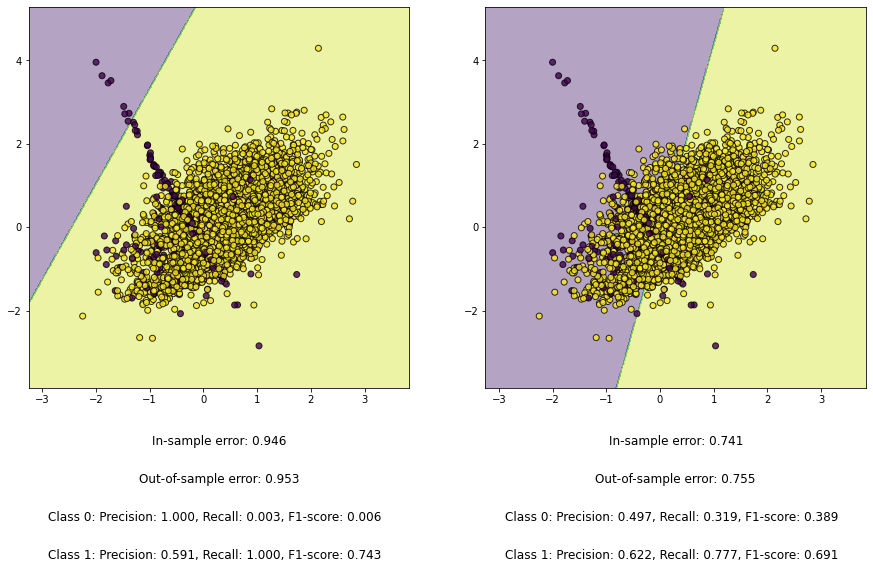

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(wspace=0.2, hspace=0.8)

ax_arr = (axs[0], axs[1])
for ax in ax_arr:
    X, y = create_dataset(weights=(0.05, 0.95), n_samples=5000, n_classes=2,
                   class_sep=0.4, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    
    if (ax == axs[0]):
        clf.fit(X_train, y_train)
    else:
        # Apply random oversampling only on the training data
        sampler = RandomOverSampler(random_state=0)
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        # Train a new classifier on the oversampled data
        model = clf.fit(X_resampled, y_resampled)
        
    plot_decision_function(X, y, clf, ax)
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)

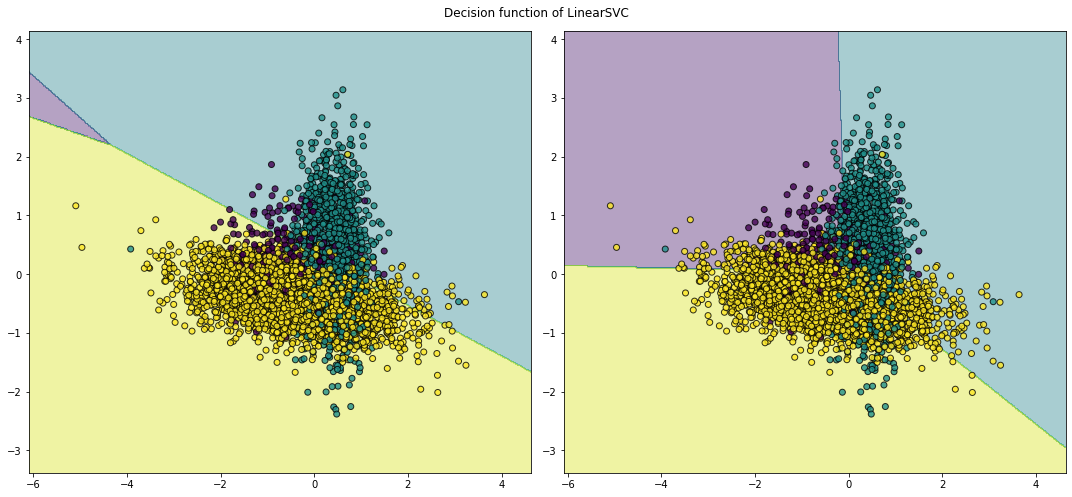

In [88]:
from imblearn.pipeline import make_pipeline

X, y = create_dataset(weights=(0.05, 0.25, 0.7), n_samples=5000, n_classes=3,
                   class_sep=0.4, n_clusters=1)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

clf.fit(X, y)
plot_decision_function(X, y, clf, axs[0])

sampler = RandomOverSampler(random_state=0)
model = make_pipeline(sampler, clf).fit(X, y)
plot_decision_function(X, y, model, axs[1])

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()


 y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)


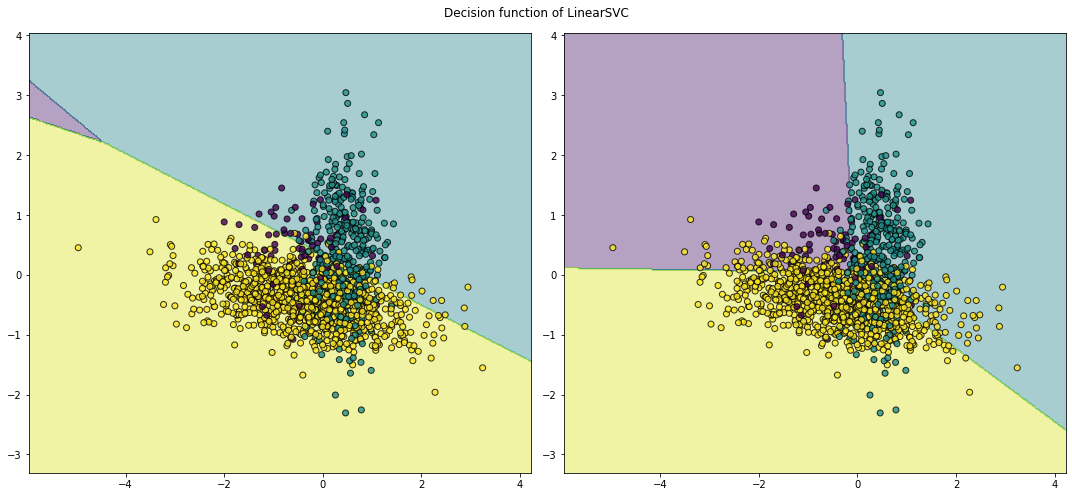

In [92]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

# Create the dataset
X, y = create_dataset(weights=(0.05, 0.25, 0.7), n_samples=5000, n_classes=3,
                      class_sep=0.4, n_clusters=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier on the original data
clf.fit(X_train, y_train)

# Create two subplots for the decision function before and after oversampling
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plot the decision function for the original classifier
plot_decision_function(X_test, y_test, clf, axs[0])

# compute in-sample error (accuracy on the unsampled training set)
y_pred_train = clf.predict(X_train)
in_sample_error = accuracy_score(y_train, y_pred_train)

# compute out-of-sample error (accuracy on the testing set)
y_pred_test = clf.predict(X_test)
out_of_sample_error = accuracy_score(y_test, y_pred_test)




# Apply random oversampling only on the training data
sampler = RandomOverSampler(random_state=0)
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

# Train a new classifier on the oversampled data
model = clf.fit(X_resampled, y_resampled)

# Plot the decision function for the oversampled classifier
plot_decision_function(X_test, y_test, model, axs[1])

# Set the title of the figure to indicate the type of classifier used
fig.suptitle(f"Decision function of {clf.__class__.__name__}")

# Adjust the spacing between the subplots to make the figure more readable
fig.tight_layout()


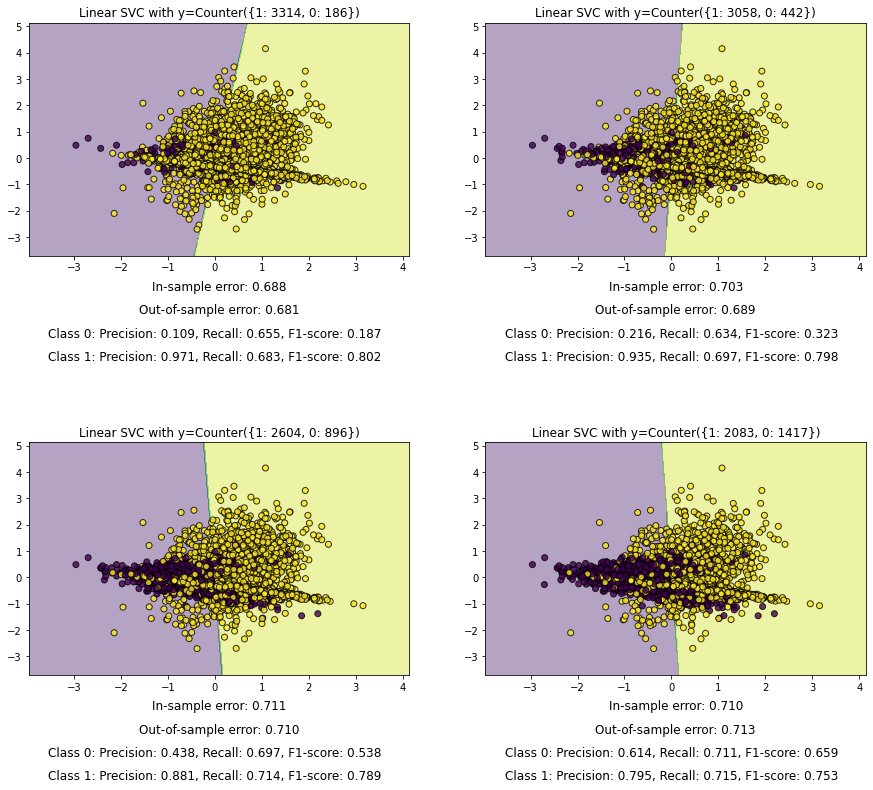

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(wspace=0.2, hspace=0.8)

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.05, 0.95), (0.12, 0.88),
               (0.25, 0.75), (0.4, 0.6))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(weights=weights, n_samples=5000, n_classes=2,
                   class_sep=0.4, n_clusters=2)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    #oversampler
    sampler = RandomOverSampler(random_state=0)
    model = LinearSVC()
    clf = make_pipeline(sampler, model).fit(X_train, y_train)
    
    ax.set_title('Linear SVC with y={}'.format(Counter(y_train)))
    
    plot_decision_function(X_train, y_train, clf, ax)
    
    y_true = y_test
    
    # compute in-sample error (accuracy on the training set)
    y_pred_train = clf.predict(X_train)
    in_sample_error = accuracy_score(y_train, y_pred_train)

    # compute out-of-sample error (accuracy on the testing set)
    y_pred_test = clf.predict(X_test)
    out_of_sample_error = accuracy_score(y_test, y_pred_test)
    
    ax.text(0.5, -0.15, "In-sample error: {:.3f}".format(in_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    ax.text(0.5, -0.25, "Out-of-sample error: {:.3f}".format(out_of_sample_error), transform=ax.transAxes, ha='center', fontsize=12)
    
    class_labels = np.unique(y)
    report = classification_report(y_true, y_pred_test, zero_division=1, output_dict=True)

    for i, label in enumerate(class_labels):
        ax.text(0.05, -0.35-i*0.1, "Class {}: Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}".format(label, report[str(label)]['precision'], report[str(label)]['recall'], report[str(label)]['f1-score']), transform=ax.transAxes, fontsize=12)


